In [2]:
from pathlib import Path


def build_dataset(paths: list[Path]):

    doc = ""

    for p in paths:
        doc += " " + p.read_text().replace("\n", " ")
    
    return doc

base_p = Path("/Users/mascit/projects/semagna/blogutils/notebooks/data.tmp")
paths = list(Path(base_p / "papers/").rglob("*_done.md")) + list(Path(base_p / "weeklies/").rglob("*_.md")) + list(Path(base_p / "other/").rglob("*_done.md")) 

long_text = build_dataset(paths)
len(long_text)

1485290

In [4]:
from gradientlab.experiments.exp20251227_imagetextzip.datagen import ImageTextGen


long_text = "ciao come va? " * 100

gen = ImageTextGen(
    canvas_size=(128, 128), 
    font_path="/home/mascit/Downloads/CozetteVector.ttf", #"/Users/mascit/Downloads/CozetteVector.ttf", #"/Users/mascit/Downloads/unifont-17.0.03.otf", #"/Users/mascit/Downloads/CozetteVector.ttf", #"/Users/mascit/Downloads/04b_03/04B_03__.TTF",
    font_size=10,
    custom_space_width=3
)

result_images = gen.render(long_text)

print(f"Generated {len(result_images)} images.")


Generated 4 images.


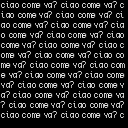

In [5]:
result_images[0][0]

In [6]:
result_images[0][1]

'ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? ciao come va? c'

In [10]:
out_dir = Path("/Volumes/Lexar/datasets/textimgzip")
out_dir.mkdir(parents=True, exist_ok=True)

In [11]:
from datasets import DatasetDict, Dataset

rows = []
for i, (img, txt) in enumerate(result_images):

    row = {"pixel_values": img, "text": txt}
    rows.append(row)

ds = Dataset.from_list(rows)
ds_dict = ds.train_test_split(train_size=0.8, seed=42)

ds_dict.save_to_disk(out_dir)

Saving the dataset (1/1 shards): 100%|██████████| 884/884 [00:00<00:00, 72357.92 examples/s]


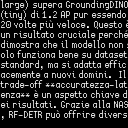

In [14]:
ds_dict["train"][0]["pixel_values"]

In [1]:
from datasets import load_dataset

/media/mascit/data/Projects/python/gradientlab/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("swap-uniba/itwiki-march-2024", num_proc=10)

Setting num_proc from 10 to 3 for the train split as it only contains 3 shards.
Generating train split: 100%|██████████| 2899019/2899019 [00:03<00:00, 761525.13 examples/s]
